In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# 1. Carga Completa

La carga completa implicaría cargar la probabilidad (Puerta P) y la función de la que se desea la integral (Puerta R) sobre el estado cuántico.

# 2. Programa Juan

Utilizamos todas las funciones de Juan para implementar una carga completa de sobre el estado cuántico.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os

In [3]:
sys.path.append('/home/gferro/Code/ProgramasDefinitivos')

In [4]:
from qat.core.console import display
from qat.qpus import LinAlg
from qat.lang.AQASM import Program
from expectation_module import load_probabilities, load_function, load_U0, load_U1, load_Q

In [5]:
a = 0.
b = 1.
nqbits = 6
n_aux  = 8

def p(x):
	return x*x
	
def f(x):
	return np.sin(x)
	
centers, probs, P_gate = load_probabilities(nqbits, p, a, b)
R_gate, y = load_function(centers, f, nqbits)

qprog = Program()
qbits = qprog.qalloc(nqbits+1)
qprog.apply(P_gate, qbits[:-1])
qprog.apply(R_gate, qbits)

In [ ]:
#Create the circuit from the program
circuit = qprog.to_circ()

#Display the circuit
%qatdisplay circuit
#%qatdisplay circuit --depth 1

In [ ]:
#Create a Job from the circuit
job = circuit.to_job(qubits = [nqbits])

#Import and create the linear algebra simulator
from qat.qpus import LinAlg
linalgqpu = LinAlg()

#Submit the job to the simulator LinAlg and get the results
result = linalgqpu.submit(job)

In [ ]:
QP = []
States = []
#Print the results
for sample in result:
    print("State %s probability %s" % (sample.state, sample.probability))
    QP.append(sample.probability)
    States.append(str(sample.state))
print('Quantum Measurement: {}'.format(QP[1]))    
print('Integral: {}'.format(sum(probs*y)))    

# 3. Rutinas Gonzalo

Utilizo mis rutinas para generar la carga completa

In [6]:
sys.path.append('/home/gferro/Code/PhaseAmplification/')

In [7]:
#from qat.core.console import display
from qat.qpus import LinAlg
from qat.lang.AQASM import Program

In [8]:
from dataloading_module import  CreateLoadFunctionGate, CreatePG
from kk import get_histogram

In [9]:
#Probability function
def p(x):
    return x*x

def f(x):
    return np.sin(x)

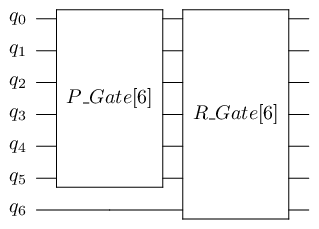

State |0> probability 0.7807295056164688
State |1> probability 0.21927049438353136
Quantum Measurement: 0.21927049438353136
Integral: 0.6697058522082925
Todo OK?: False


In [10]:
nqbits = 6
nbins = 2**nqbits
a = 0
b = 1
#Discretization for the function domain
centers, probs = get_histogram(p, a, b, nbins)
#Discretizated function to load 
DiscretizedFunction = f(centers)

#Quantum Program
qprog = Program()
qbits = qprog.qalloc(nqbits+1)
#Create Probability loading gate
P_gate = CreatePG(probs)
qprog.apply(P_gate, qbits[:-1])
#Create Function loading gate
R_gate = CreateLoadFunctionGate(DiscretizedFunction)    
qprog.apply(R_gate, qbits)

#Create the circuit from the program
circuit = qprog.to_circ()
    
#Display the circuit
#display(circuit, max_depth = depth)
%qatdisplay circuit
    

#Create a Job from the circuit
#The integral is loaded in the amplitud of the last qbit!!
job = circuit.to_job(qubits = [nqbits])
    
#Import and create the linear algebra simulator
linalgqpu = LinAlg()
    
#Submit the job to the simulator LinAlg and get the results
result = linalgqpu.submit(job)
QP = []
States = []
#Print the results
for sample in result:
    print("State %s probability %s" % (sample.state, sample.probability))
    QP.append(sample.probability)
    States.append(str(sample.state))
        
print('Quantum Measurement: {}'.format(QP[1]))    
print('Integral: {}'.format(sum(DiscretizedFunction*probs)))    
print('Todo OK?: {}'.format(np.isclose(QP[1], sum(DiscretizedFunction*probs))))